In [45]:
from requests import Session
from bs4 import BeautifulSoup
import numpy as np
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [40]:
session = Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:69.0) Gecko/20100101 Firefox/69.0'
})
response = session.get('http://cbr.ru/hd_base/mrrf/mrrf_7d/')
soup = BeautifulSoup(response.text)
td = [e.text for e in soup.select('table.data td')]
date, data = td[::2], [float(x.replace(',', '.')) for x in td[1::2]]

In [41]:
x = np.array([d for d in date[20::-1]])
y = np.array([v for v in data[20::-1]])
y2 = np.array([v1 - v2 for v1,v2 in zip(data[20::-1], data[21:0:-1])])

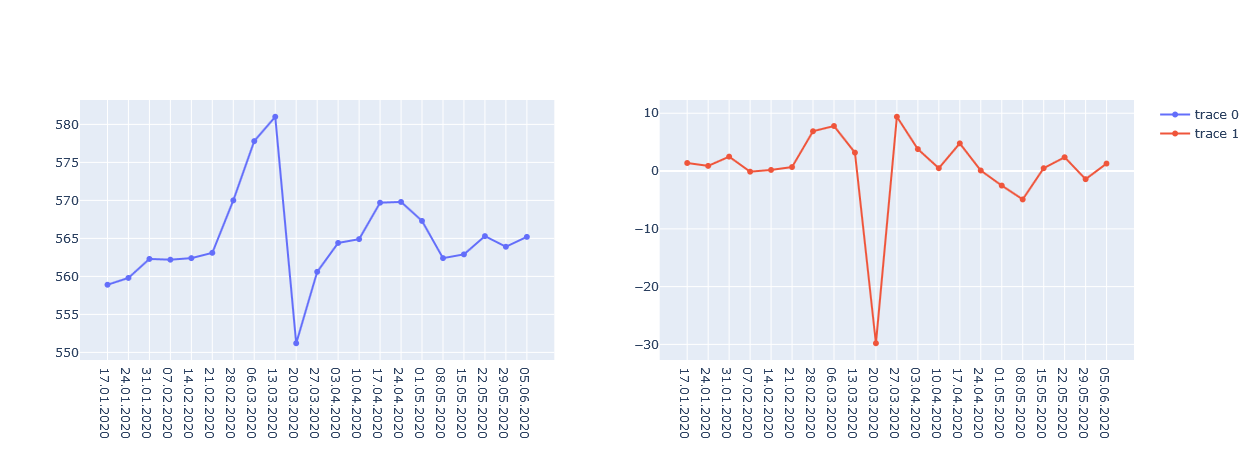

In [54]:
fig = make_subplots(1, 2)
fig.add_trace(go.Scatter(x=x, y=y, mode='markers + lines'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=y2, mode='markers + lines'), 1, 2)
fig.show()